In [1]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [2]:
print(tf.keras.__version__)

2.8.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train_full, y_train_full),(x_test_full,y_test_full) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
# num of classes
np.unique(y_train_full).shape[0]

10

In [14]:
#dimensions of each image  are 28*28

x_train_full.shape

(60000, 28, 28)

In [ ]:
np.max(x_train_full[0])

255

In [ ]:
np.min(x_train_full[0])

0

In [29]:
train_filter = np.unique(y_train_full, return_index=True)
print(train_filter)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 1,  3,  5,  7,  2,  0, 13, 15, 17,  4]))


In [42]:
train_filter[1]

array([ 1,  3,  5,  7,  2,  0, 13, 15, 17,  4])

In [43]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
train_filter = np.unique(Y_train, return_index=True)
X_train, Y_train = X_train[train_filter[1:]], Y_train[train_filter[1:]]

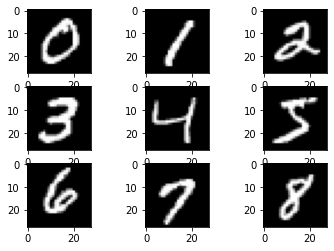

In [68]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
# plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))
plt.show()

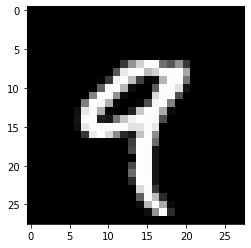

In [66]:
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

In [ ]:
#normalizing
x_train_full = x_train_full/255.0
x_test_full = x_test_full/255.0



In [69]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model1.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),)
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [70]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model2.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(200, activation="relu", name="HiddenLayer2"))
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer3"))
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer4"))
model2.add(tf.keras.layers.Dense(50, activation="relu", name="HiddenLayer5"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 200)               60200     
                                                                 
 HiddenLayer3 (Dense)        (None, 100)               20100     
                                                                 
 HiddenLayer4 (Dense)        (None, 100)               10100     
                                                                 
 HiddenLayer5 (Dense)        (None, 50)                5050      
                                                                 
 outputLayer (Dense)         (None, 10)               

In [71]:
#import datetime
#start = datetime.datetime.now()

model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 32
epochs = 15

history = model1.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

#end = datetime.datetime.now()
#print("Time taken to run:", end-start)

Epoch 1/15
1688/1688 [==============================] - 8s 3ms/step - loss: 1.2495 - accuracy: 0.8453 - val_loss: 0.2714 - val_accuracy: 0.9302
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2841 - accuracy: 0.9256 - val_loss: 0.1447 - val_accuracy: 0.9605
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1888 - accuracy: 0.9491 - val_loss: 0.1466 - val_accuracy: 0.9625
Epoch 4/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1565 - accuracy: 0.9581 - val_loss: 0.1250 - val_accuracy: 0.9707
Epoch 5/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1359 - accuracy: 0.9634 - val_loss: 0.1189 - val_accuracy: 0.9677
Epoch 6/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1167 - accuracy: 0.9700 - val_loss: 0.1136 - val_accuracy: 0.9695
Epoch 7/15
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1057 - accuracy: 0.9727 - val_loss: 0.1134 - val_accuracy:

In [72]:
history2 = model2.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4977 - accuracy: 0.8917 - val_loss: 0.1810 - val_accuracy: 0.9470
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1851 - accuracy: 0.9478 - val_loss: 0.1443 - val_accuracy: 0.9570
Epoch 3/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1472 - accuracy: 0.9587 - val_loss: 0.1213 - val_accuracy: 0.9682
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9651 - val_loss: 0.1232 - val_accuracy: 0.9682
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9702 - val_loss: 0.1040 - val_accuracy: 0.9728
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0913 - accuracy: 0.9751 - val_loss: 0.1144 - val_accuracy: 0.9710
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0818 - accuracy: 0.9777 - val_loss: 0.1112 - val_accuracy:

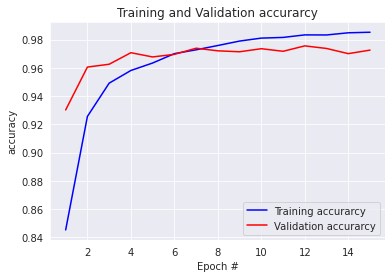

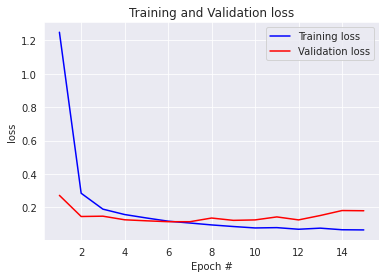

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()


In [74]:
model1.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 4ms/step - loss: 0.2001 - accuracy: 0.9660


[0.20007313787937164, 0.9660000205039978]

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = model1.predict(x_test_full, len(y_test_full)//batch_size)

In [76]:
import numpy as np
y_pred1 = np.argmax(Y_pred1, axis=1)

In [77]:
print('Confusion Matrix')
cm = confusion_matrix(y_test_full, y_pred1)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm)


Confusion Matrix
[[ 964    0    0    0    2    4    6    0    4    0]
 [   0 1120    2    2    0    2    4    0    5    0]
 [   1    0 1009    3    0    0    2    4   13    0]
 [   0    0    5  937    0   48    0    3   17    0]
 [   2    0    3    0  953    0    8    3    4    9]
 [   2    0    0    1    0  881    5    0    3    0]
 [   1    2    1    0    1    9  942    0    2    0]
 [   3    7   14    7    0    0    0  981   14    2]
 [  10    0    2    1    3   26    2    2  927    1]
 [   4    4    0    2   13   12    0    6   22  946]]


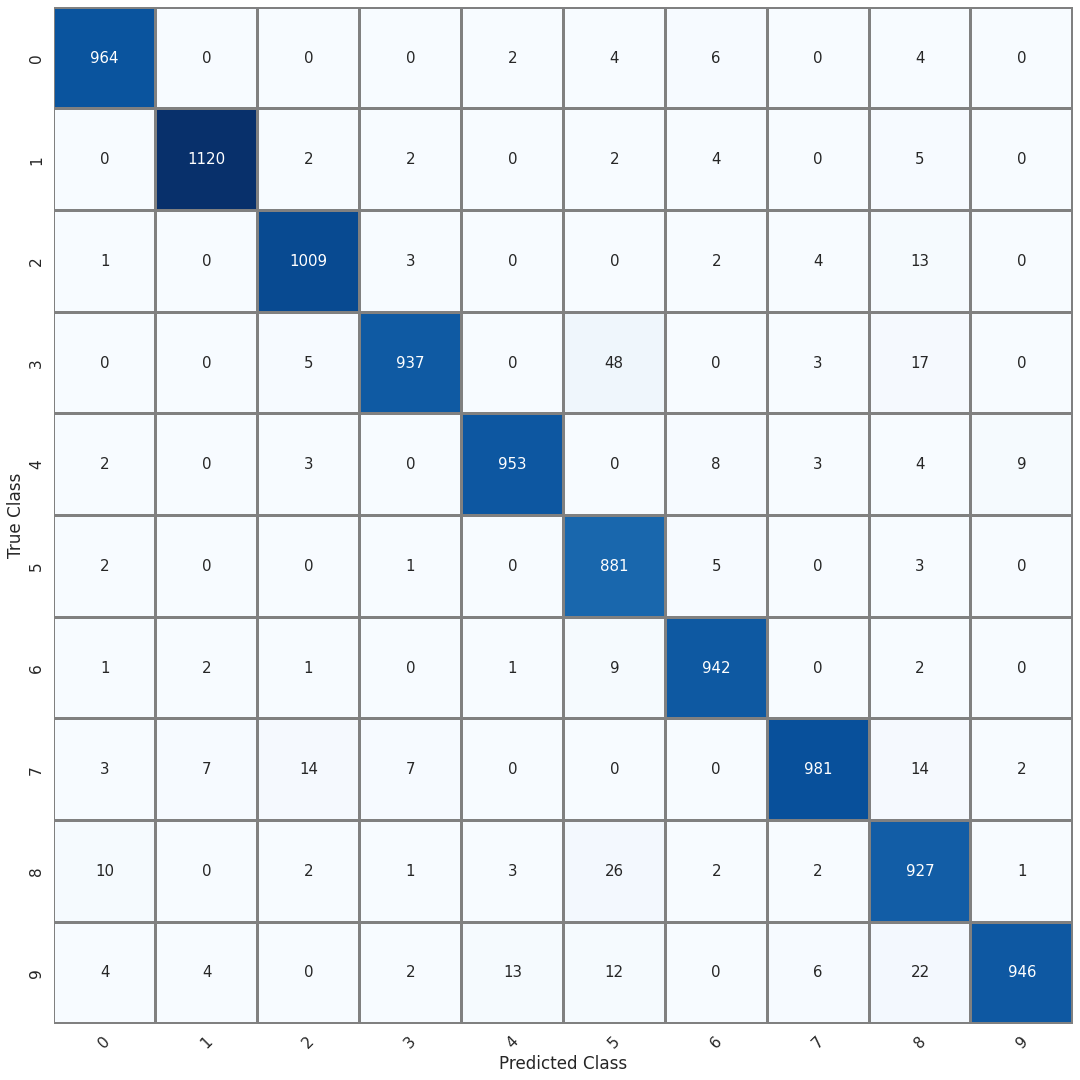

In [78]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sn.set(font_scale=1.4) # for label size
g = sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

In [79]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred1))

Accuracy 0.966


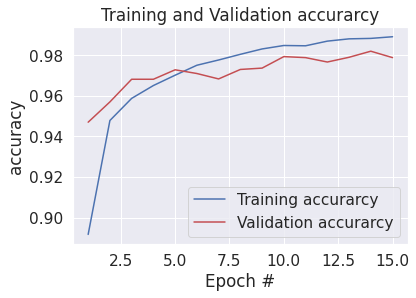

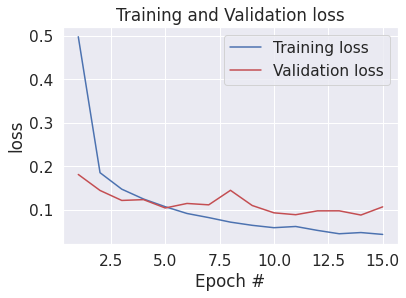

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred2 = model2.predict(x_test_full, len(y_test_full)//batch_size)

In [85]:
import numpy as np
y_pred2 = np.argmax(Y_pred2, axis=1)

In [87]:
print('Confusion Matrix')
cm1 = confusion_matrix(y_test_full, y_pred2)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm1)

Confusion Matrix
[[ 969    0    3    0    0    2    3    1    1    1]
 [   0 1118    3    1    0    2    4    2    5    0]
 [   3    0 1020    2    1    0    1    4    1    0]
 [   0    0    7  965    0   21    0    6    4    7]
 [   0    3    2    0  951    0    7    1    2   16]
 [   3    0    0    0    0  879    6    0    3    1]
 [   2    2    1    0    5    2  944    0    2    0]
 [   2    0    9    0    1    0    0 1006    0   10]
 [   3    0   23    2    2    5    5    4  922    8]
 [   3    4    0    1   11    2    0    5    0  983]]


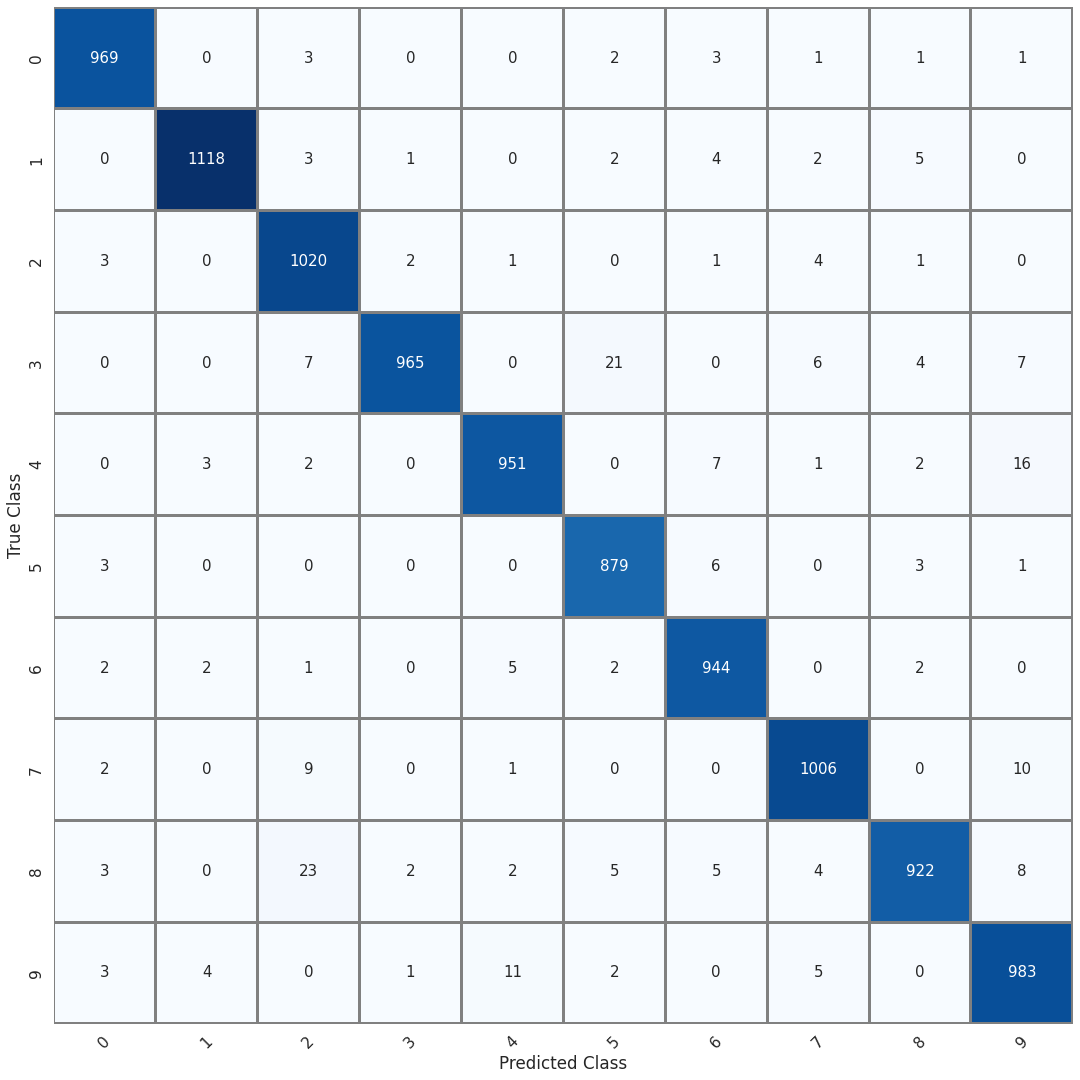

In [88]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
array_downsize_upsize_random = cm1

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sn.set(font_scale=1.4) # for label size
g = sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

In [89]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test_full, y_pred2))

Accuracy 0.9757


In [ ]:
#7 Since the dataset has less number of examples. in the small data regime small and larger neural networks perform approximately at the samelevel.